   Format FloVsMan   Media  mean     var       std
0      24      flo  media1  0.36  0.0000  0.000000
1      24      flo  media2  0.46  0.0012  0.034641
2      24      flo  media3  0.52  0.0048  0.069282
3      24      flo  media4  0.54  0.0000  0.000000
4      24      man  media1  0.12  0.0000  0.000000
5      24      man  media2  0.40  0.0012  0.034641
6      24      man  media3  0.40  0.0012  0.034641
7      24      man  media4  0.44  0.0012  0.034641
8      96      flo  media1  0.26  0.0012  0.034641
9      96      flo  media2  0.32  0.0012  0.034641
10     96      flo  media3  0.30  0.0000  0.000000
11     96      flo  media4  0.34  0.0012  0.034641
12     96      man  media1  0.20  0.0012  0.034641
13     96      man  media2  0.24  0.0000  0.000000
14     96      man  media3  0.26  0.0012  0.034641
15     96      man  media4  0.30  0.0000  0.000000


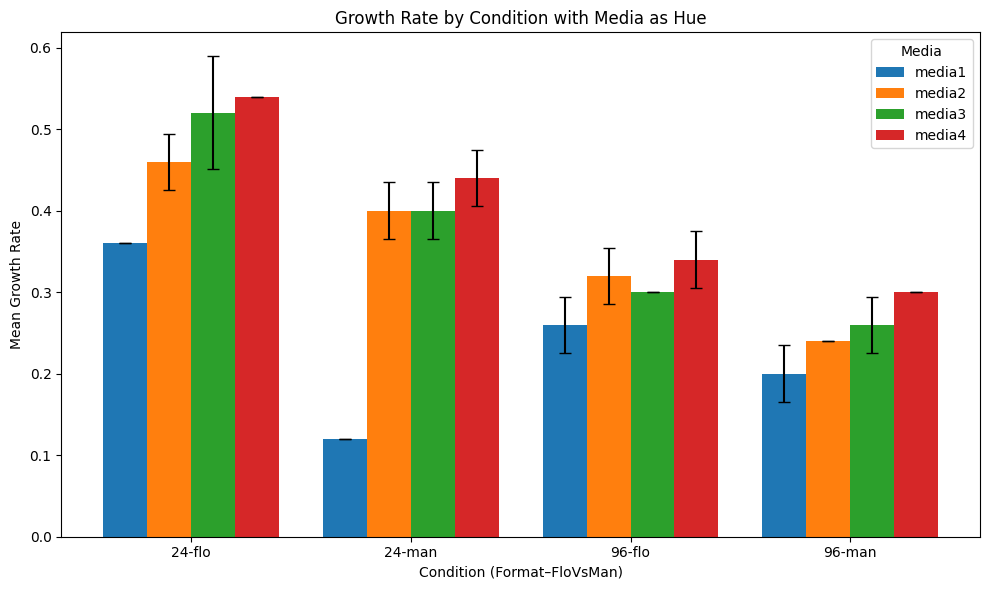

In [1]:
path = 'data/GrowthProfilerNonParametricResults_3reps.csv'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the csv file
df=pd.read_csv(path)

# split the 'Identifier' column into new columns

# Split the 'Identifier' column into new columns
identifier_split = df['Identifier'].str.split('_', expand=True)
df['WellPlate'] = identifier_split[0]
df['Format'] = identifier_split[1]
df['FloVsMan'] = identifier_split[2]
df['Media'] = identifier_split[3]


# Group by Format, FlowType, and Media and calculate mean and variance of GrowthRate
summary_stats = df.groupby(['Format', 'FloVsMan', 'Media'])['GrowthRate'].agg(['mean', 'var']).reset_index()
summary_stats['std'] = np.sqrt(summary_stats['var'])

# Display the summary statistics
print(summary_stats)

# Make sure std + Condition exist
summary_stats['Condition'] = summary_stats['Format'].astype(str) + "-" + summary_stats['FloVsMan']

conds  = summary_stats['Condition'].unique()
medias = summary_stats['Media'].unique()

x = np.arange(len(conds))        # positions for conditions
width = 0.8 / len(medias)        # distribute bars within each group

plt.figure(figsize=(10,6))
for i, media in enumerate(medias):
    sub = summary_stats[summary_stats['Media']==media]
    plt.bar(
        x + i*width, 
        sub['mean'], 
        width, 
        label=f"{media}", 
        yerr=sub['std'], 
        capsize=4
    )

plt.xticks(x + width*(len(medias)-1)/2, conds)
plt.xlabel("Condition (Format–FloVsMan)")
plt.ylabel("Mean Growth Rate")
plt.title("Growth Rate by Condition with Media as Hue")
plt.legend(title="Media")
plt.tight_layout()
plt.show()


In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

# Two-way ANOVA with Media as a blocking factor
model = ols("GrowthRate ~ C(Format) * C(FloVsMan) + C(Media)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Mixed-effects model (Media as random effect)
import statsmodels.formula.api as smf
mixed = smf.mixedlm("GrowthRate ~ C(Format) * C(FloVsMan)", data=df, groups=df["Media"])
mixed_res = mixed.fit()
print(mixed_res.summary())


                         sum_sq    df          F        PR(>F)
C(Format)              0.195075   1.0  68.667740  2.686405e-10
C(FloVsMan)            0.102675   1.0  36.142305  4.161926e-07
C(Media)               0.196425   3.0  23.047650  6.650814e-09
C(Format):C(FloVsMan)  0.016875   1.0   5.940116  1.922587e-02
Residual               0.116475  41.0        NaN           NaN
                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        GrowthRate
No. Observations:        48             Method:                    REML      
No. Groups:              4              Scale:                     0.0028    
Min. group size:         12             Log-Likelihood:            56.8909   
Max. group size:         12             Converged:                 Yes       
Mean group size:         12.0                                                
-----------------------------------------------------------------------------
                  

c:\Users\uqkmuroi\gitcode\Yarrowia_media_optimizer\venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_15412\930209021.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_15412\930209021.py:30: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(
C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_15412\930209021.py:30: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(
C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_15412\930209021.py:46: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.stripplot(


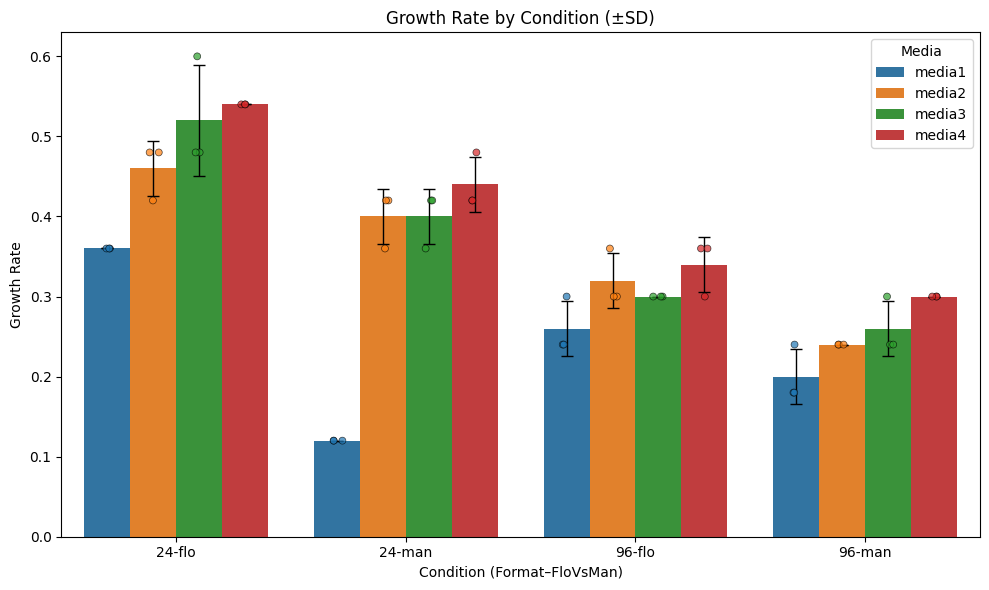

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_15412\930209021.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_15412\930209021.py:30: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(
C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_15412\930209021.py:30: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(
C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_15412\930209021.py:46: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.stripplot(


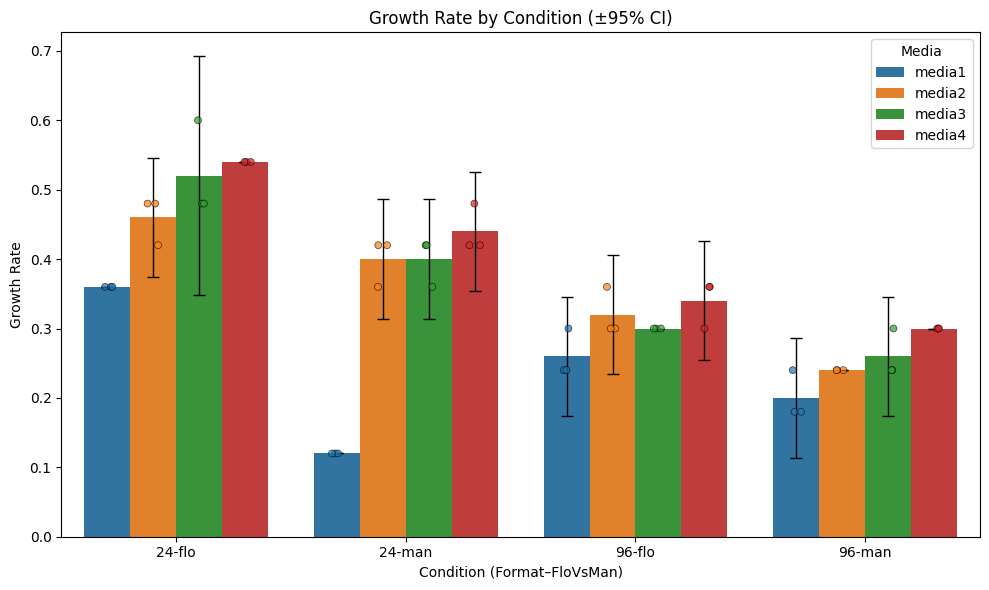

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# --- Compute summary stats ---
stats_sd = df.groupby(['Format', 'FloVsMan', 'Media']).agg(
    mean=('GrowthRate','mean'),
    std=('GrowthRate','std')
).reset_index()

stats_ci = df.groupby(['Format', 'FloVsMan', 'Media']).agg(
    mean=('GrowthRate','mean'),
    n=('GrowthRate','count'),
    std=('GrowthRate','std')
).reset_index()
stats_ci['sem'] = stats_ci['std'] / np.sqrt(stats_ci['n'])
stats_ci['ci95'] = stats_ci['sem'] * st.t.ppf(0.975, stats_ci['n']-1)

for stats, err_col, err_label, title in [
    (stats_sd, 'std', 'SD', "Growth Rate by Condition (±SD)"),
    (stats_ci, 'ci95', '95% CI', "Growth Rate by Condition (±95% CI)")
]:
    stats['Condition'] = stats['Format'].astype(str) + "-" + stats['FloVsMan']

    plt.figure(figsize=(10,6))
    palette = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Bars
    sns.barplot(
        data=stats,
        x='Condition', y='mean', hue='Media',
        capsize=0.2, errwidth=1.5, palette=palette,
        ci=None
    )

    # Error bars
    for i, row in stats.iterrows():
        xpos = list(stats['Condition'].unique()).index(row['Condition'])
        offset = list(stats['Media'].unique()).index(row['Media'])
        xpos = xpos + (offset - (len(stats['Media'].unique())-1)/2) * 0.8/len(stats['Media'].unique())
        plt.errorbar(x=xpos, y=row['mean'],
                     yerr=row[err_col], fmt='none', c='black', capsize=4, lw=1)

    # Raw replicate points with black outline
    sns.stripplot(
        data=df,
        x=df['Format'].astype(str) + "-" + df['FloVsMan'],
        y='GrowthRate', hue='Media',
        dodge=True, jitter=True, alpha=0.7,
        palette=palette, edgecolor='black', linewidth=0.5
    )

    # Clean legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:len(stats['Media'].unique())],
               labels[:len(stats['Media'].unique())],
               title="Media")

    plt.xlabel("Condition (Format–FloVsMan)")
    plt.ylabel("Growth Rate")
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [4]:
import numpy as np
import pandas as pd
import itertools
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import t

def condition_label(s):
    return f"{s['Format'].iloc[0]}-{s['FloVsMan'].iloc[0]}"

def one_way_stats(sub):
    # ANOVA: GrowthRate ~ C(Media)
    model = ols("GrowthRate ~ C(Media)", data=sub).fit()
    aov = sm.stats.anova_lm(model, typ=2)
    # Extract terms
    ss_between = aov.loc['C(Media)', 'sum_sq']
    df_between = aov.loc['C(Media)', 'df']
    ss_within  = aov.loc['Residual', 'sum_sq']
    df_within  = aov.loc['Residual', 'df']
    ms_between = ss_between / df_between
    ms_within  = ss_within  / df_within
    snr = ms_between / ms_within if ms_within > 0 else np.inf
    eta2 = ss_between / (ss_between + ss_within) if (ss_between + ss_within) > 0 else np.nan
    sigma = np.sqrt(ms_within)

    # Cohen's d between best and 2nd best media (by mean)
    gmeans = sub.groupby('Media')['GrowthRate'].agg(['mean','var','count']).reset_index()
    gmeans = gmeans.sort_values('mean', ascending=False)
    if len(gmeans) >= 2:
        m1, v1, n1 = gmeans.iloc[0][['mean','var','count']]
        m2, v2, n2 = gmeans.iloc[1][['mean','var','count']]
        sp = np.sqrt(((n1-1)*v1 + (n2-1)*v2) / (n1+n2-2)) if (n1+n2-2)>0 else np.nan
        cohend_top2 = (m1 - m2) / sp if sp and sp>0 else np.nan
        top2_gap = m1 - m2
        top2_names = (gmeans.iloc[0]['Media'], gmeans.iloc[1]['Media'])
    else:
        cohend_top2, top2_gap, top2_names = np.nan, np.nan, (np.nan, np.nan)

    return {
        'snr_media': snr,
        'eta2_media': eta2,
        'resid_sd': sigma,
        'cohend_top2': cohend_top2,
        'top2_gap': top2_gap,
        'top_media': top2_names[0],
        'second_media': top2_names[1],
        'k_media': sub['Media'].nunique(),
        'n_total': len(sub)
    }

def mde_two_sample_equal_n(sigma, n_per_group, alpha=0.05, power=0.8):
    # Two-sided t-test, equal n, common SD = sigma
    # delta = (z_{1-alpha/2}+z_{power})*sigma*sqrt(2/n)  (use t crits approx.)
    df = 2*n_per_group - 2
    t_alpha = t.ppf(1 - alpha/2, df)
    t_beta  = t.ppf(power, df)  # already positive for power (since it's a quantile)
    return (t_alpha + t_beta) * sigma * np.sqrt(2 / n_per_group)

rows = []
for (fmt, how), sub in df.groupby(['Format','FloVsMan']):
    stats = one_way_stats(sub)
    stats.update({'Condition': f"{fmt}-{how}"})
    # Plan different replicate counts to guide design:
    for nplan in [2, 3, 4, 5]:
        stats[f'MDE_n{nplan}'] = mde_two_sample_equal_n(stats['resid_sd'], nplan)
    rows.append(stats)

signal_table = pd.DataFrame(rows)[[
    'Condition','snr_media','eta2_media','resid_sd','cohend_top2','top2_gap','top_media','second_media',
    'k_media','n_total','MDE_n2','MDE_n3','MDE_n4','MDE_n5'
]].sort_values('Condition')

print(signal_table.to_string(index=False))


Condition  snr_media  eta2_media  resid_sd  cohend_top2  top2_gap top_media second_media  k_media  n_total   MDE_n2   MDE_n3   MDE_n4   MDE_n5
   24-flo  13.066667    0.830508  0.038730     0.408248      0.02    media4       media3        4       12 0.207720 0.117555 0.091815 0.078259
   24-man  72.888889    0.964706  0.030000     1.154701      0.04    media4       media2        4       12 0.160899 0.091058 0.071120 0.060619
   96-flo   3.888889    0.593220  0.030000     0.577350      0.02    media4       media2        4       12 0.160899 0.091058 0.071120 0.060619
   96-man   8.666667    0.764706  0.024495     1.632993      0.04    media4       media3        4       12 0.131374 0.074348 0.058069 0.049495
